#### 数据分析
使用房屋的数据集，清洗数据，把房屋面积缩小10倍，房价扩大10倍处理。

使用numpy , pandas, matplotlib综合应用，完成如下可视图：


In [1]:
# 导包并设置字体
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']

In [2]:
# 读取数据集
data = pd.read_csv('data/房屋交易数据集.csv',engine='python',encoding='gbk')

In [3]:
data.head()

,编号,区域,楼盘,价格,面积,交易月份
0,1,工业园区,Lvl,208500,1710,1
1,2,工业园区,Lvl,181500,1262,2
2,3,高新区,Lvl,223500,1786,3
3,4,高新区,Lvl,140000,1717,4
4,5,高新区,Lvl,250000,2198,5


In [4]:
# 初步处理数据
data["价格"] = data["价格"]*10
data["面积"] = data["面积"]*0.1

In [5]:
# 清理面积大于400的房屋数据
areaIdex = data[data['面积'] > 400].index
data.drop(areaIdex, inplace=True)
data[data['面积'] > 400]

,编号,区域,楼盘,价格,面积,交易月份


In [8]:
# 分组并求和
data2 = data.groupby(['区域','交易月份'])[['价格','面积']].sum()
data2

价格       面积
区域   交易月份                    
其他区  1       9148650    798.6
     4       5900000    353.0
     7       2590000    153.0
     8        730000     76.4
     9       1635000    165.7
古城区  1      28781000   2135.5
     2      23314000   1813.9
     3       4360000    334.4
     4      16582340   1298.1
     5       7760000    659.0
     6       9182800    596.9
     8       1560000     99.0
     9       6791540    479.7
工业园区 1     269662200  24028.9
     2     261590790  23822.3
     3     261276550  22991.7
     4     207995160  17989.1
     5     149576510  12186.6
     6     122255330  10178.5
     7     100032970   8622.9
     8      91130060   7934.8
     9      60462500   5322.1
高新区  1     207844250  16053.2
     2     172390930  13702.6
     3     186343990  13556.8
     4     124548440  10583.9
     5     106412410   8622.2
     6      56999530   4595.6
     7      41407000   3462.1
     8      50508510   3864.0
     9      34229500   2866.2

In [ ]:
data2['单价'] = data2['价格'] / data2['面积']

In [ ]:
total1 = data2['单价']['古城区'] # data2是按照月份与区域分组的,所以区域和月份天然就是索引
total2 = data2['单价']['工业园区']
total3 = data2['单价']['高新区']

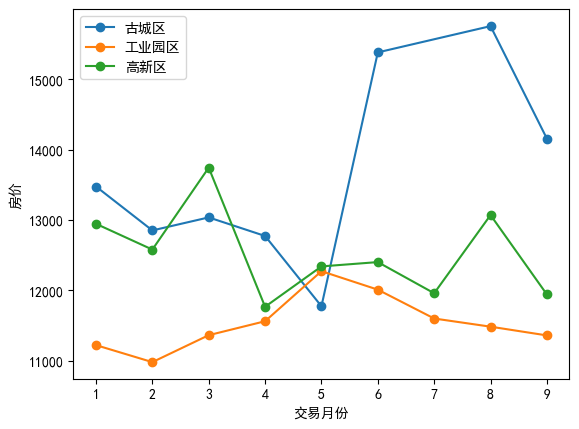

In [ ]:
plt.plot(total1,'o-')
plt.plot(total2,'o-')
plt.plot(total3,'o-')
plt.legend(['古城区','工业园区','高新区'])
plt.xlabel('交易月份')
plt.ylabel('房价')
plt.show()

##### 第一张图

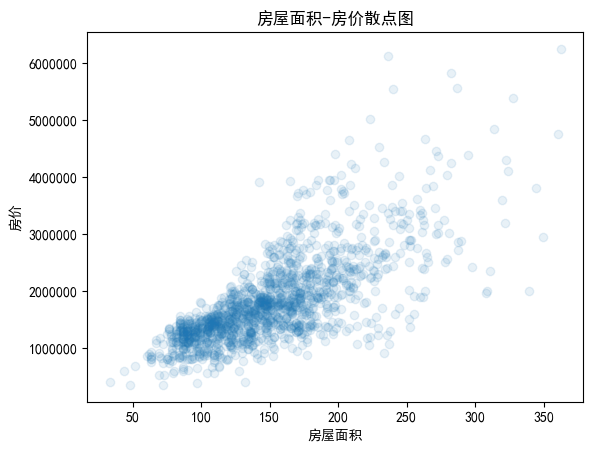

In [ ]:
plt.scatter(data['面积'], data['价格'],alpha=0.1)
plt.xlabel('房屋面积')
plt.ylabel('房价')
plt.title('房屋面积-房价散点图')
plt.ticklabel_format(axis='y', style='plain')  # 禁用科学计数法
plt.show()

#### PAT-1071 小赌怡情
1. 太阴间了,题干里给的输出格式跟输出样例的格式不一样!!!输出样例的格式比题干格式多一个空格!!!
3. 输完要立马结束循环
4. 可以将输光判断放到减筹码的后面,这样一旦输完,立马退出,不会再读入下一组数据
5. 阴间题目还没有阴间到初始筹码给0的地步

In [ ]:
T, K = input().split()
T = int(T)
K = int(K)

for i in range(K):
    n1, b, t, n2 = map(int, input().split())
    # if T == 0:
    #     print('Game Over.')
    #     break

    if t > T:
        print(f'Not enough tokens.  Total = {T}.')
        continue

    if (b == 0 and n2 < n1) or (b == 1 and n2 > n1):
        T += t
        print(f"Win {t}!  Total = {T}.")
    else:
        T -= t
        print(f"Lose {t}.  Total = {T}.")
        if T == 0:
            print('Game Over.')
            break

ValueError: not enough values to unpack (expected 2, got 0)

#### PAT-1072 开学寄语

In [ ]:
N, M = map(int, input().split())
contraband = list(map(int, input().split()))
total_loot = 0
total_convict = 0

for _ in range(N):
    lst = input().split()
    name = lst[0]
    loot = []

    for i in lst[2:]:
        if int(i) in contraband:
            loot.append(i)
            total_loot += 1

    if  loot:
        total_convict += 1
        print(f"{name}: {' '.join(loot)}")
        
print(total_convict, total_loot)

#### PAT-1040

In [ ]:

input_str = input()

sum = 0

for i in input_str:
    if i == 'A':
        count_p = input_str[:input_str.index(i)].count('P')
        count_t = input_str[input_str.index(i)+1:].count('T')
        sum += count_p * count_t

print(sum%1000000007)


In [ ]:
MOD = 10**9 + 7

s = input().strip()
n = len(s)

# 预处理前缀P的数量
prefix_p = [0] * (n + 1)  # prefix_p[i]表示前i个字符中P的数量
for i in range(1, n + 1):
    prefix_p[i] = prefix_p[i - 1] + (1 if s[i - 1] == 'P' else 0)

# 预处理后缀T的数量
suffix_t = [0] * (n + 1)  # suffix_t[i]表示从i开始到结尾的T的数量
for i in range(n - 1, -1, -1):
    suffix_t[i] = suffix_t[i + 1] + (1 if s[i] == 'T' else 0)

# 计算结果
res = 0
for i in range(n):
    if s[i] == 'A':
        res = (res + prefix_p[i] * suffix_t[i + 1]) % MOD

print(res)

In [ ]:
MOD = 10**9 + 7

s = input().strip()
n = len(s)
prefix_p = [0] * n
suffix_t = [0] * n

# 从左到右统计P的数量
count_p = 0
for i in range(n):
    if s[i] == 'P':
        count_p += 1
    prefix_p[i] = count_p

# 从右到左统计T的数量
count_t = 0
for i in range(n-1, -1, -1):
    if s[i] == 'T':
        count_t += 1
    suffix_t[i] = count_t

# 计算每个A对应的PAT数量
result = 0
for i in range(n):
    if s[i] == 'A':
        result = (result + prefix_p[i] * suffix_t[i]) % MOD

print(result)